In [1]:
%load_ext autoreload
import uproot as ut
import utils
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import vector

from tqdm import tqdm

from utils.cutConfig import *
%autoreload 2

In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root:sixBtree"
ttree = ut.open(filename)
branches = utils.Branches(ttree)
preselection = utils.Selection(branches,cuts={"njetcut":6,"etacut":None},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = utils.Selection(branches,cuts={"etacut":None},mask=sixb_in_preselection,variable="jet_btag",include=preselection,tag="baseline")
print(baseline)

--- all  ---
Event Efficiency:      0.84
Event Selected Purity: 0.29
--- all baseline ---
Event Efficiency:      0.29
Event Selected Purity: 1.00


# Selection Study

In [3]:
first_njet_lbtag = [
    utils.Selection(branches,cuts={"btagcut":jet_btagWP[looseWP]},variable="jet_btag",njets=njets,tag="jet lbtag",include=baseline)
    for njets in range(1,8)
]

In [4]:
second_njet_remaining = [
    utils.Selection(branches,cuts={"etacut":None},variable="jet_pt",tag="remaining",previous=previous,include=baseline)
    for previous in first_njet_lbtag
]

In [5]:
merged_njet = [ selection.merge() for selection in second_njet_remaining ]

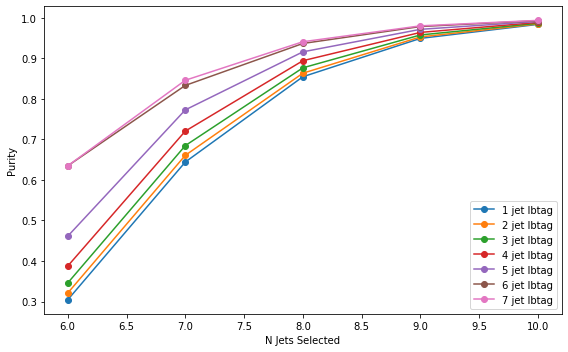

In [6]:
utils.selection_comparison_study(merged_njet,[ f"{njet.njets} jet lbtag" for njet in first_njet_lbtag ])